In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [133]:
df = pd.read_csv(r'C:\Users\tesla\OneDrive\Desktop\AI-Artificial-Inteligence-\ML practice\Feature Engineering\movies rating.csv')

In [134]:
df.head()

,Unnamed: 0,Rank,Movie,World Profit,Gross,National View,Foreign Profit,International View
0,0,1,NaN,"$1,698,863,816","$652,980,194",38.4%,"$1,045,883,622",61.6%
1,1,2,NaN,"$1,338,073,645","$636,745,858",47.6%,"$701,327,787",52.4%
2,2,3,NaN,"$1,026,899,678","$450,182,382",43.8%,"$576,717,296",56.2%
3,3,4,NaN,"$969,126,452","$361,004,205",37.3%,"$608,122,247",62.7%
4,4,5,Domestic,"$717,365,125","$468,982,125",65.4%,"$248,383,000",34.6%


In [135]:
data=[]

In [143]:
st =[  'Gross', 'Foreign Profit','World Profit']
flt=['International View', 'National View']

for i in flt:
    df[i] = df[i].astype(str).str.replace(r'[$,]', '', regex=True) \
                            .str.replace('%', '', regex=True) \
                            .replace('-', 0) \
                            .astype(float)

In [144]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [145]:
df.replace(0,np.nan,inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                200 non-null    int64  
 1   Movie               196 non-null    object 
 2   World Profit        200 non-null    float64
 3   Gross               131 non-null    float64
 4   National View       131 non-null    float64
 5   Foreign Profit      196 non-null    float64
 6   International View  196 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.1+ KB


In [139]:
df.isnull().mean()

Rank                  0.000
Movie                 0.020
World Profit          0.000
Gross                 0.345
National View         0.000
Foreign Profit        0.020
International View    0.000
dtype: float64

In [150]:
X = df.drop(columns=['National View'])
y = df['National View']

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [152]:
X_train.shape, X_test.shape

((160, 6), (40, 6))

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 137 to 168
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                160 non-null    int64  
 1   Movie               158 non-null    object 
 2   World Profit        160 non-null    float64
 3   Gross               103 non-null    float64
 4   Foreign Profit      156 non-null    float64
 5   International View  156 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.8+ KB


In [14]:
mean_Gross = X_train['Gross'].mean()
median_Gross = X_train['Gross'].median()

mean_Foreign_Profit = X_train['Foreign Profit'].mean()
median_Foreign_Profit = X_train['Foreign Profit'].median()

mean_International_View  = X_train['International View'].mean()
median_International_View  = X_train['International View'].median()

TypeError: Could not convert string '3.1%100%5.2%100%-100%39.1%100%98.3%60.5%100%61.5%34.9%100%47.8%0.2%51.4%64.7%100%1.5%44%20.5%81.6%100%8.3%42.9%100%40.5%4.1%46.5%100%99.4%100%56.5%52.4%98.6%100%34.8%0.6%100%48.2%56.4%84.8%100%46.9%61.6%61.3%100%100%100%60.8%100%0.1%87%55.7%50.1%-70%61.9%100%100%37.8%100%100%100%64.1%71.9%99.3%57.7%28.5%100%100%100%100%39.8%42.4%20.3%85.8%100%100%30.9%45.3%55.7%100%100%88.4%100%100%52%100%27.9%49.6%35.8%46.9%97.1%25%26.9%100%97.5%100%100%70.3%46.4%46%100%100%53.1%100%97.5%26.4%100%84.2%91.8%100%-97.2%47.9%15.1%100%35.3%100%40.7%100%100%100%100%51.9%100%0.5%38.7%-87.9%41.4%53%88.5%59.6%100%97.5%34.6%91.4%76.1%92.9%32.9%76.8%100%54.4%60.2%77.8%100%27.8%100%100%65.7%31.6%100%48.9%43.9%100%28.1%100%' to numeric

In [37]:
X_train['Gross_median'] = X_train['Gross'].fillna(mean_Gross)
X_train['Gross_mean'] = X_train['Gross'].fillna(mean_Gross)

X_train['ForeignP_median'] = X_train['Foreign Profit'].fillna(mean_Foreign_Profit)
X_train['ForeignP_mean'] = X_train['Foreign Profit'].fillna(mean_Foreign_Profit)

X_train['iView_median'] = X_train['International View'].fillna(mean_International_View)
X_train['iView_mean'] = X_train['International View'].fillna(mean_International_View)

In [141]:
X_train.head(2)

,Rank,World Profit,Gross,Foreign Profit,International View
137,138.0,14873918.0,14409169.0,464749.0,3.1%
111,112.0,NaN,19512134.0,1078209.0,5.2%


In [40]:
print('Original Gross variable variance: ', X_train['Gross'].var())
print('Gross Variance after median imputation: ', X_train['Gross_mean'].var())
print('Gross Variance after mean imputation: ', X_train['Gross_median'].var())

print('Original Foreign Profit variable variance: ', X_train['Foreign Profit'].var())
print('Foreign Profit Variance after median imputation: ', X_train['ForeignP_mean'].var())
print('Foreign Profit Variance after mean imputation: ', X_train['ForeignP_median'].var())

print('Original Fare variable variance: ', X_train['International View'].var())
print('Fare Variance after median imputation: ', X_train['iView_mean'].var())
print('Fare Variance after mean imputation: ', X_train['iView_median'].var())

Original Gross variable variance:  1.2132784238182654e+16
Gross Variance after median imputation:  7783295549022834.0
Gross Variance after mean imputation:  7783295549022834.0
Original Foreign Profit variable variance:  1.3523855375880002e+16
Foreign Profit Variance after median imputation:  1.3183632599128304e+16
Foreign Profit Variance after mean imputation:  1.3183632599128304e+16
Original Fare variable variance:  989.5642593052102
Fare Variance after median imputation:  964.6695609579098
Fare Variance after mean imputation:  964.6695609579098


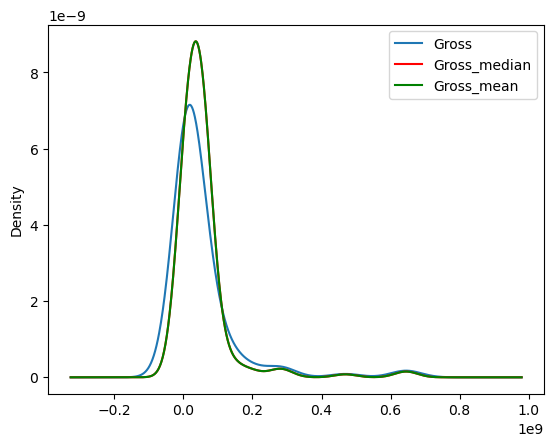

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Gross'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Gross_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Gross_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

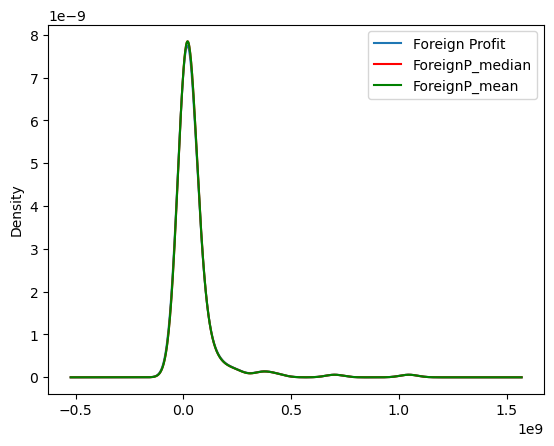

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Foreign Profit'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['ForeignP_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['ForeignP_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

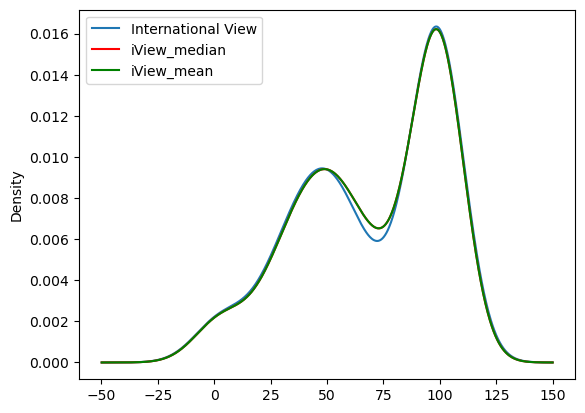

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['International View'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['iView_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['iView_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

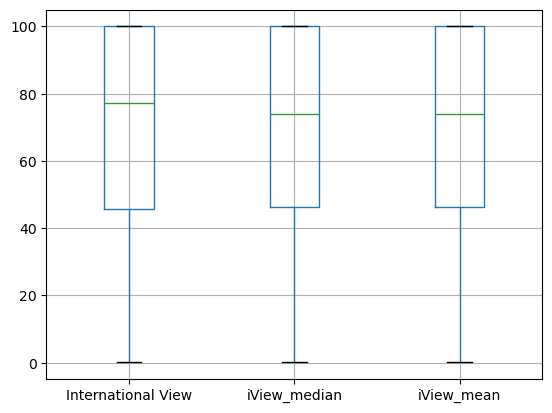

In [46]:
X_train[['International View', 'iView_median', 'iView_mean']].boxplot()

<Axes: >

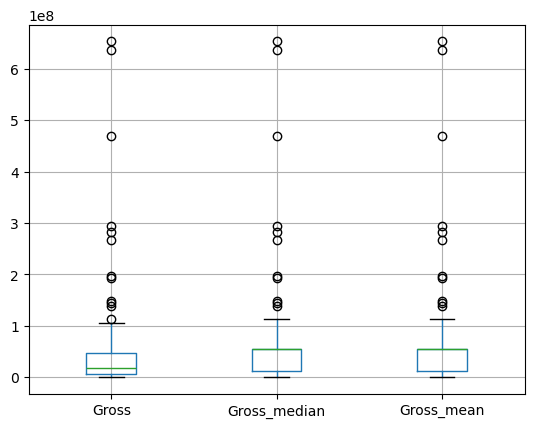

In [45]:
X_train[['Gross', 'Gross_median', 'Gross_mean']].boxplot()

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [240]:
X_train

,Rank,Movie,World Profit,Gross,Foreign Profit,International View
137,138,Doctor X: The Movie,14873918.0,14409169.0,464749.0,3.1
163,164,Niko: Beyond the Northern Lights,11227393.0,NaN,11227393.0,100.0
111,112,Wicked Little Letters,20590343.0,19512134.0,1078209.0,5.2
123,124,Pushpa: The Rule - Part 2,17520972.0,NaN,17520972.0,100.0
109,110,Chantal in Fairyland,20656654.0,20656654.0,NaN,NaN
...,...,...,...,...,...,...
43,44,Bob Marley: One Love,83677281.0,42777281.0,40900000.0,48.9
22,23,Dune: Part Two,201967521.0,113376590.0,88590931.0,43.9
72,73,"I, the Executioner",37164152.0,NaN,37164152.0,100.0
15,16,Foreign,372262265.0,267762265.0,104500000.0,28.1


In [248]:
X_train.drop('Movie',axis=1,inplace=True)

In [22]:
X_train.shape
,'Gross','Foreign Profit'

(160, 5)

In [29]:
X_train['Foreign Profit'].iloc[2]

1078209.0

In [26]:
for i in range(160):
    if X_train['Foreign Profit'].iloc[i]:
        (X_train['Foreign Profit'].iloc[i]+0.000001/1000)

In [ ]:
X_train.iloc[1,1] = np.NaN
X_train.iloc[3,1] = np.NaN
X_train.iloc[-1,-1] = np.NaN

In [41]:
X_train = X_train[
    X_train['World Profit'].notna() & 
    X_train['Gross'].notna() & 
    X_train['Foreign Profit'].notna() & 
    X_train['International View'].notna()
]
dn = X_train


In [249]:
X_train = X_train.dropna(subset=['World Profit', 'Gross', 'Foreign Profit', 'International View'])
dn = X_train.copy()


In [252]:
dn

,Rank,World Profit,Gross,Foreign Profit,International View
137,138,14873918.0,14409169.0,464749.0,3.1
111,112,20590343.0,19512134.0,1078209.0,5.2
41,42,88650412.0,53981071.0,34669341.0,39.1
140,141,14602614.0,242069.0,14360545.0,98.3
5,6,714644358.0,282144358.0,432500000.0,60.5
...,...,...,...,...,...
7,8,571850016.0,196350016.0,375500000.0,65.7
104,105,22057160.0,15097632.0,6959528.0,31.6
43,44,83677281.0,42777281.0,40900000.0,48.9
22,23,201967521.0,113376590.0,88590931.0,43.9


In [251]:
import random
unique_numbers = unique_numbers = random.sample(range(1, 90), 88)


for i in unique_numbers:
    col = random.choice(range(0,5))
    print(i,col)
    X_train.iloc[i,col] = np.NaN


6 4
1 4
7 4
80 2
81 3
87 3
45 3
11 2
85 3
61 1
37 3
2 2
77 4
84 1
74 3
83 0
60 1
4 2
70 0
22 1
75 3
8 0
15 1
27 4
68 4
32 2
20 3
16 3
18 3
39 4
56 3
34 0
43 1
10 1
71 0
30 0
46 2
50 2
65 0
26 3
42 4
41 3
66 1
67 4
25 0
47 2
86 0
69 3
57 4
64 4
5 4
35 4
17 2
62 3
79 0
78 3
44 3
21 1
76 3
53 4
82 3
63 3
14 2
3 4
89 2
13 3
40 4
52 3
55 4
54 0
31 4
48 3
49 4
72 3
59 3
73 4
51 0
36 4
29 0
23 3
33 0
58 4
9 1
12 4
88 1
24 4
28 3
38 2


In [265]:
dn.iloc[30:40]

,Rank,World Profit,Gross,Foreign Profit,International View
0,1,1.698864e+09,652980194.0,1.045884e+09,61.6
27,28,1.741758e+08,67475791.0,1.067000e+08,61.3
20,21,2.345737e+08,91956547.0,1.426171e+08,60.8
156,157,1.223095e+07,12215102.0,1.584800e+04,0.1
142,143,1.429156e+07,1855384.0,1.243618e+07,87.0
77,78,3.534002e+07,15671307.0,1.966871e+07,55.7
30,31,1.380833e+08,68967012.0,6.911627e+07,50.1
17,18,3.508653e+08,105313091.0,2.455523e+08,70.0
59,60,4.925624e+07,18771004.0,3.048524e+07,61.9
127,128,1.657322e+07,10306106.0,6.267119e+06,37.8


In [263]:
X_train.iloc[30:40]

,Rank,World Profit,Gross,Foreign Profit,International View
0,NaN,1.698864e+09,652980194.0,1.045884e+09,61.6
27,28.0,1.741758e+08,67475791.0,1.067000e+08,NaN
20,21.0,2.345737e+08,NaN,1.426171e+08,60.8
156,NaN,1.223095e+07,12215102.0,1.584800e+04,0.1
142,NaN,1.429156e+07,1855384.0,1.243618e+07,87.0
77,78.0,3.534002e+07,15671307.0,1.966871e+07,NaN
30,31.0,1.380833e+08,68967012.0,6.911627e+07,NaN
17,18.0,3.508653e+08,105313091.0,NaN,70.0
59,60.0,4.925624e+07,NaN,3.048524e+07,61.9
127,128.0,1.657322e+07,10306106.0,6.267119e+06,NaN


In [264]:
imput.iloc[30:40]

,0,1,2,3,4
30,-172.893737,1.698864e+09,6.529802e+08,1.045884e+09,61.600000
31,28.000000,1.741758e+08,6.747579e+07,1.067000e+08,48.304401
32,21.000000,2.345737e+08,9.200524e+07,1.426171e+08,60.800000
33,95.587775,1.223095e+07,1.221510e+07,1.584800e+04,0.100000
34,94.263056,1.429156e+07,1.855384e+06,1.243618e+07,87.000000
35,78.000000,3.534002e+07,1.567131e+07,1.966871e+07,44.353038
36,31.000000,1.380833e+08,6.896701e+07,6.911627e+07,43.338019
37,18.000000,3.508653e+08,1.053131e+08,2.455907e+08,70.000000
38,60.000000,4.925624e+07,1.882349e+07,3.048524e+07,61.900000
39,128.000000,1.657322e+07,1.030611e+07,6.267119e+06,43.387631


In [255]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [256]:
imputer = IterativeImputer(
    estimator=None,              # Default estimator is BayesianRidge
    max_iter=10,                 # Maximum number of imputation iterations
    random_state=0,              # For reproducibility
    initial_strategy='mean',     # Strategy for initial imputation: mean, median, most_frequent, or constant
    imputation_order='ascending',# Order of imputation: ascending, descending, roman, arabic, random
    skip_complete=True,         # Whether to skip columns without missing values
    min_value=None,              # Minimum possible imputed value
    max_value=None,              # Maximum possible imputed value
                  # Tolerance to declare convergence
    n_nearest_features=None,     # Number of nearest features to use for imputation (None = all)          # Adds binary missing indicators for each imputed column
)

# Apply imputer
imputed_data = imputer.fit_transform(X_train.select_dtypes(include=[np.number]))


In [257]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imput=imputer.fit_transform(X_train)

In [276]:
imput=pd.DataFrame(imput)

In [259]:
imput.head()

,0,1,2,3,4
0,138.0,14873918.0,1.440917e+07,464749.0,3.100000
1,112.0,20590343.0,1.951213e+07,1078209.0,41.472415
2,42.0,88650412.0,5.401507e+07,34669341.0,39.100000
3,141.0,14602614.0,2.420690e+05,14360545.0,45.788138
4,6.0,714644358.0,2.821827e+08,432500000.0,60.500000


In [272]:
imput[0]

0     138.0
1     112.0
2      42.0
3     141.0
4       6.0
      ...  
94      8.0
95    105.0
96     44.0
97     23.0
98     16.0
Name: 0, Length: 99, dtype: float64

In [275]:
dn.columns

Index(['Rank', 'World Profit', 'Gross', 'Foreign Profit',
       'International View'],
      dtype='object')

In [278]:
#'Gross', 'Foreign Profit', 'International View'
imput.rename(columns={0: 'Rank',1:'World Profit',2:'Gross',3: 'Foreign Profit',4: 'International View'},inplace=True)

c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

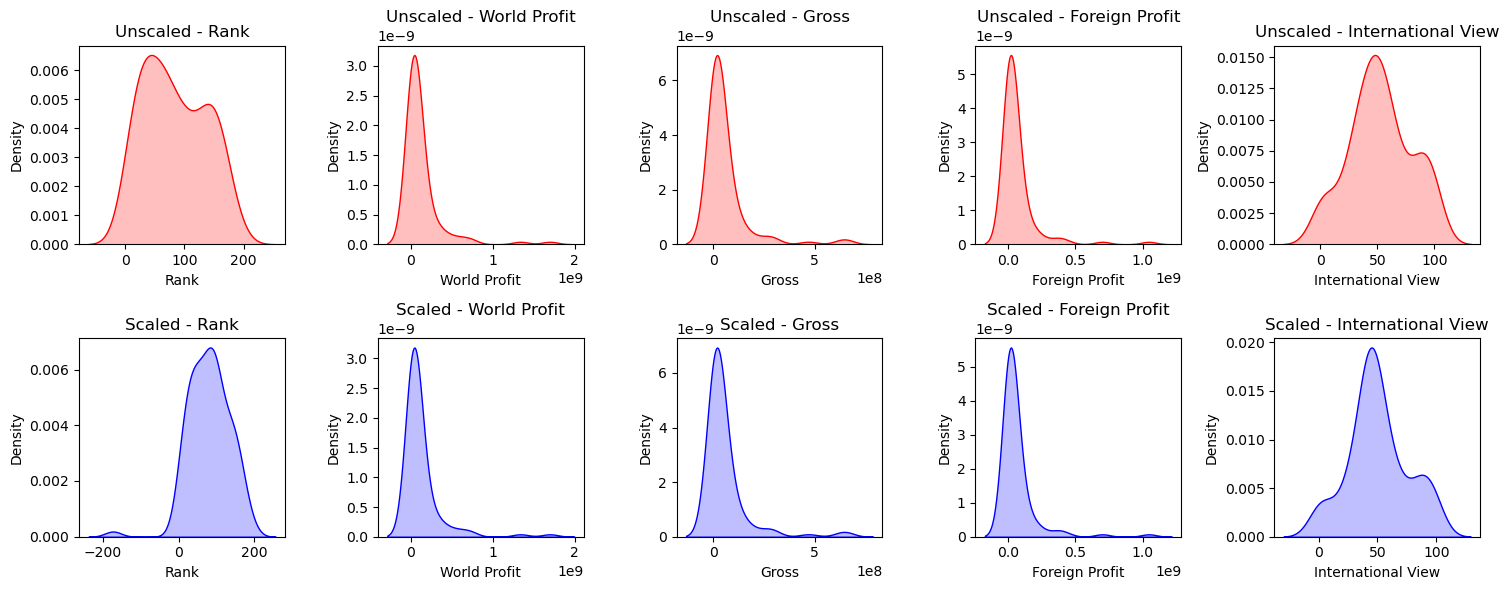

In [279]:
import seaborn as sns
Scaled = pd.DataFrame(imput, columns=['Rank', 'World Profit', 'Gross', 'Foreign Profit',
       'International View'])
unScaled = pd.DataFrame(dn, columns=['Rank', 'World Profit', 'Gross', 'Foreign Profit',
       'International View'])

# Create subplots (2 rows: unscaled & scaled, columns for each feature)
fig, axes = plt.subplots(nrows=2, ncols=len(Scaled.columns), figsize=(15, 6))

for idx, col in enumerate(Scaled.columns):
    # KDE for Unscaled Data (Top Row)
    sns.kdeplot(unScaled[col], ax=axes[0, idx], color='red', fill=True)
    axes[0, idx].set_title(f'Unscaled - {col}')
    
    # KDE for Scaled Data (Bottom Row)
    sns.kdeplot(Scaled[col], ax=axes[1, idx], color='blue', fill=True)
    axes[1, idx].set_title(f'Scaled - {col}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [52]:
trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='median'),['Gross']),
    ('imputer2',SimpleImputer(strategy='mean'),['International View','Foreign Profit'])
],remainder='passthrough')

In [53]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Gross']),
                                ('imputer2', SimpleImputer(),
                                 ['International View', 'Foreign Profit'])])

In [54]:
trf.named_transformers_['imputer1'].statistics_

array([17657658.])

In [55]:
trf.named_transformers_['imputer2'].statistics_

array([6.97711538e+01, 4.94928482e+07])